<a href="https://colab.research.google.com/github/Akashsr-svg/Education/blob/main/Gold_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [5]:
#loading the csv data to a Pandas DataFrame
gold_data=pd.read_csv("gld_price_data.csv")


print first five rows in data frame

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#last 5 frames of the dataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
#Getting some basic info on data.
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#checking the number of missing values.
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#Getting statistical measures of this data.25% of values are less than 1239
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Corelation:
1.Positive COrrelation(when we take 2 variable if 1 value increases other values also increases)
2.Negative Correlation(vice versa)

In [16]:
gold_data=gold_data.drop('Date',axis=1)#helps in removing value error.
correlation = gold_data.corr()

<Axes: >

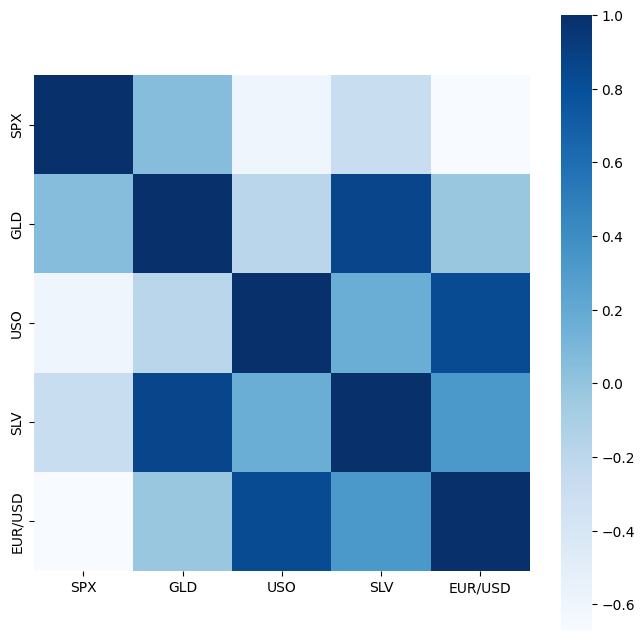

In [20]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size:8'},cmap='Blues')

In [21]:
#corelation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-9ef2625b2d17>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

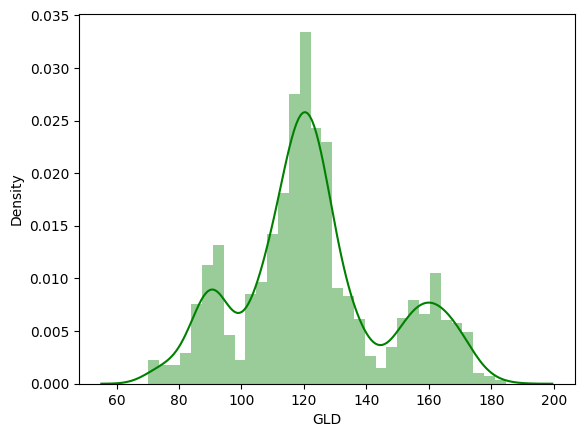

In [23]:
#Checking the distribution of the gold prices
sns.distplot(gold_data['GLD'],color='green')

splitting the features and target(Gold price)

In [26]:
X=gold_data.drop(['GLD'],axis=1)#whenever dropping column axis should be one
Y=gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:Random Forest model (it consists of more than one model comibne together caled as ensemble model.THere would be n number of decision tree and it would use the majority of voting system and then get us the predicted values and checks for specific values in the range.

In [31]:
regressor=RandomForestRegressor(n_estimators=100)

In [33]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [34]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.45919938  81.86729992 116.19770032 127.59990094 120.76480103
 154.71319806 149.94639803 126.05150036 117.34259897 126.02350031
 116.49310122 171.86190077 141.49799868 167.69989821 115.16540012
 117.50580054 138.90580216 170.27360125 159.34910375 161.41709938
 155.06690012 125.28230061 175.50639964 157.25720353 125.13610062
  93.9587997   77.5104998  120.63370024 119.11229953 167.39909987
  88.39670024 125.49650002  91.24620059 117.76020043 121.08099883
 136.10549989 115.33670127 115.00830078 146.94669936 107.73170094
 104.74320281  87.35899804 126.50850051 118.01710012 153.8565996
 119.5592003  108.33779998 108.25779845  93.18960054 127.13559753
  74.95890044 113.81369943 121.59050033 111.19579888 118.85569881
 120.94399965 159.71400076 170.77140123 146.7775967   85.90459855
  94.34570038  86.82179872  90.34570021 119.08190067 126.4320011
 127.61330063 169.4674992  122.29589911 117.44189914  98.84860031
 168.35330142 142.71819876 132.57390214 121.06340244 120.84999941
 119.7016002

In [37]:
#R squared error to compare actual value to predicted value
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9893011436541048


In [38]:
#Compare the actual and predicted valeues in a plot
Y_test=list(Y_test)

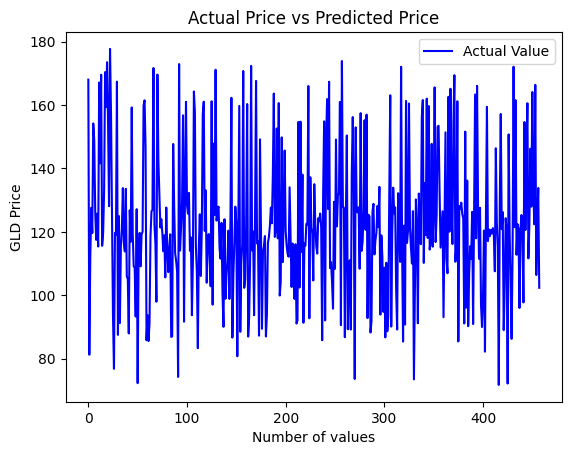

In [41]:
plt.plot(Y_test,color='blue',label='Actual Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

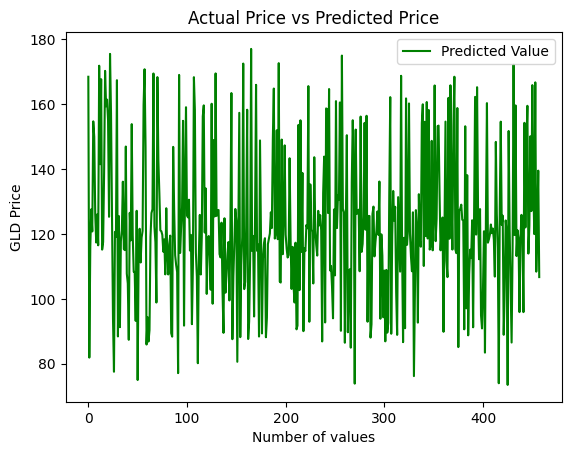

In [40]:

plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()